<a href="https://colab.research.google.com/github/ibribr/Control-Engineering/blob/main/HA_3_Exam_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 9.0 MB/s eta 0:00:00


In [ ]:
from control import tf, tf2ss, forced_response, pzmap, tfdata, feedback
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

Open loop TF =  
   361
---------
s^2 + 361

wn =  19.0
zeta =  0
Tp =  0.16534698176788384
%OS =  100.0
Ts =  inf
closed loop TF =  
   361
---------
s^2 + 722

Poles =  [-0.+26.87005769j  0.-26.87005769j]
Zeros =  []
kp =  1.0
ess =  0.5


<ipython-input-24-86b26e2931ad>:8: RuntimeWarning: divide by zero encountered in scalar divide
  Ts = 4/(zeta*wn)


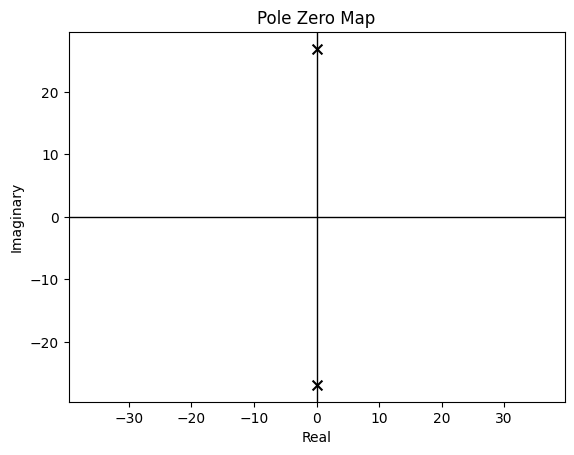

In [ ]:
# Define your transfer function:
#G(s) = 361 / (s^2+16s+361)

wn = np.sqrt(361)
zeta = 0#16/(2*wn)
Tp = np.pi/(wn*np.sqrt(1-zeta**2))
OS = np.exp(-zeta*np.pi/np.sqrt(1-zeta**2))*100
Ts = 4/(zeta*wn)

num = [wn**2]
den = [1, 2*zeta*wn, wn**2]
G = tf(num,den)
print ("Open loop TF = ", G)


print("wn = ", wn)
print("zeta = ", zeta)      # 0 < zeta < 1 (underdamped system)
print("Tp = ", Tp)
print("%OS = ", np.round(OS))
print("Ts = ", Ts)


CL = feedback(G, 1)

print("closed loop TF = ", CL)

(p,z) = pzmap(CL)
print("Poles = ",p)
print("Zeros = ",z)

kp = G.dcgain()
print("kp = ", kp)
print("ess = ", 1/(1+kp))

Text(0, 0.5, 'volt')

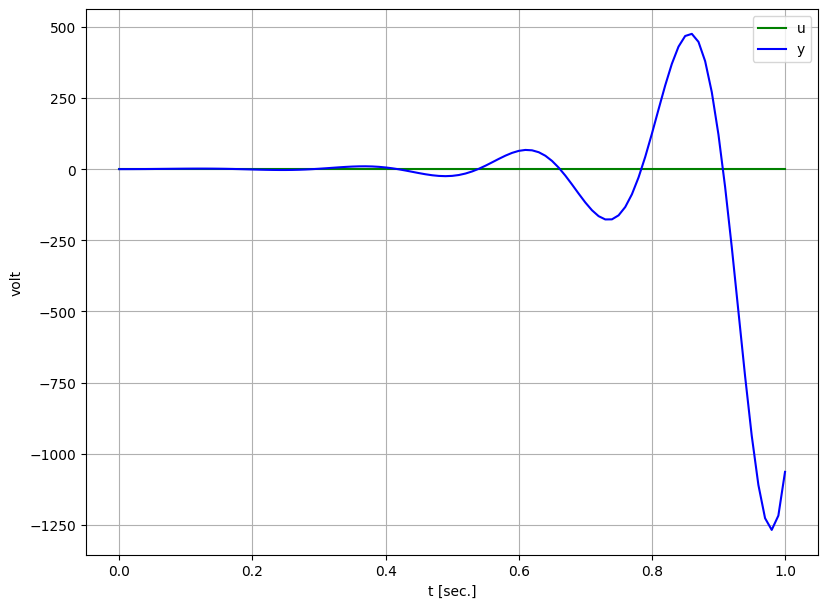

In [ ]:
#Step test of the closed loop TF
# define signals :
t0 = 0
t1 = 1
dt = 0.01
nt = int( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

u = 1 * np.ones(nt)

# Simulation :
(t, y) = forced_response(CL, T=t, U=u, X0=0)

# Plotting :
plt.close("all")

fig_width_cm = 24
fig_height_cm = 18

plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")

State Space Representation:
A matrix: 
 [[ -16. -722.]
 [   1.    0.]]
B matrix: 
 [[1.]
 [0.]]
C matrix: 
 [[  0. 361.]]
D matrix: 
 [[0.]]


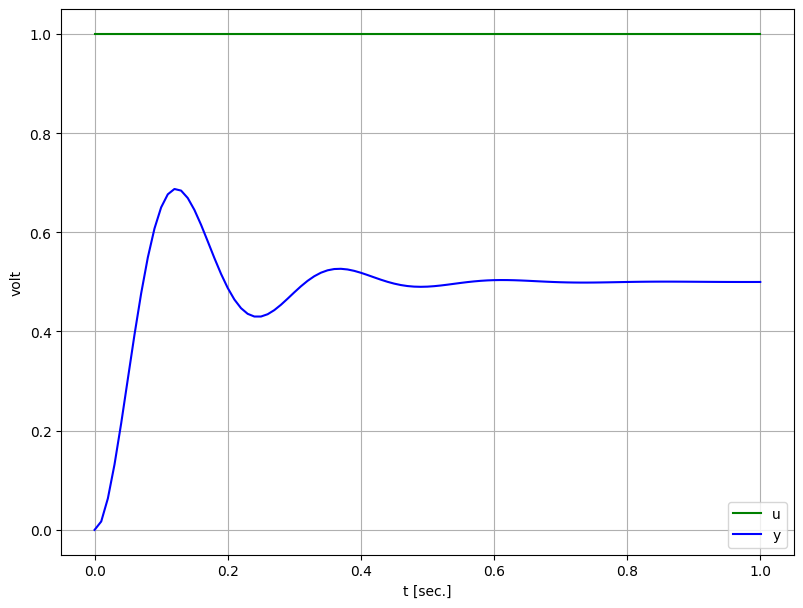

In [ ]:
# Convert to State Space
sys = tf2ss(CL)
A = sys.A
B = sys.B
C = sys.C
D = sys.D

print("State Space Representation:")
print("A matrix: \n", A)
print("B matrix: \n", B)
print("C matrix: \n", C)
print("D matrix: \n", D)

# Simulation :
(t, y) = forced_response(sys, T=t, U=u, X0=0)

# Plotting :
plt.close("all")
plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, u, "green")
plt.plot(t, y, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")

2
(1001,)


<ipython-input-25-c8ced24ab915>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yplot[i] = y


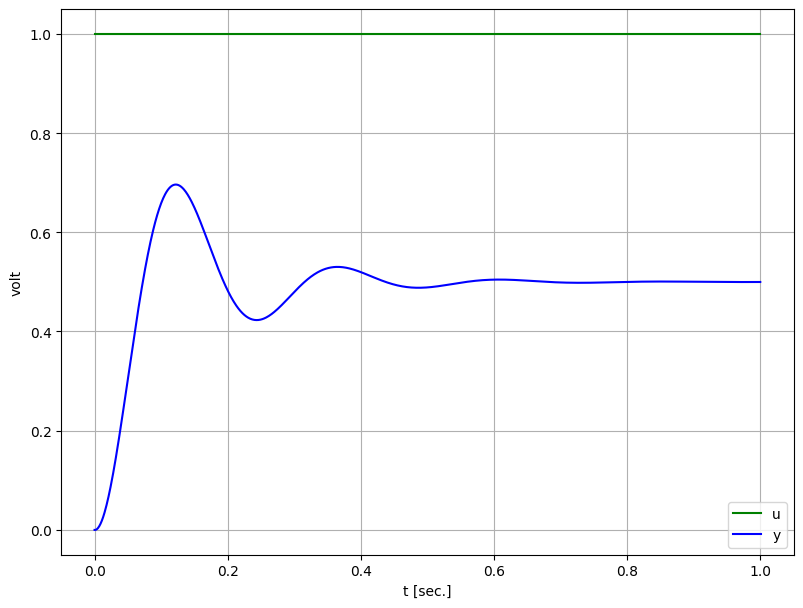

In [ ]:
sys = tf2ss(G)
A = sys.A
B = sys.B
C = sys.C
D = sys.D

print(A.shape[0])

# Simulate in a "for" loop
t0 = 0
t1 = 1
dt = 0.001
nt = int ( t1 / dt ) + 1 # Number of points of sim time
t = np.linspace(t0, t1, nt)

r = 1 * np.ones(nt)  # Reference input

# controller parameters
kp = 1.0
ki = 0.0
u = 0.0

x = np.zeros([A.shape[0],1])
yplot = np.zeros(nt)
print(yplot.shape)
sum_e = 0

for i in range(nt):
  # state space model
  xdot=np.dot(A, x)+np.dot(B,u)
  x = x + xdot*dt
  y = np.dot(C,x)+np.dot(D,u)

  # controller
  e = r[i] - y
  u = kp * e + ki * sum_e
  sum_e = sum_e + e

  yplot[i] = y

# Plotting :
plt.close("all")
plt.figure(1, figsize =(fig_width_cm/2.54,fig_height_cm/2.54))
plt.plot(t, r, "green")
plt.plot(t, yplot, "blue")

plt.grid()
plt.legend(labels =( "u", "y"))
plt.xlabel("t [sec.]")
plt.ylabel("volt")
plt.savefig("sim_tf.pdf")